In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.ft2font as ft
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

In [3]:
os.chdir('datasets/kmnist')

In [4]:
os.listdir()

['kmnist-train-labels.npz',
 'NotoSansCJKjp-Regular.otf',
 'kmnist-test-labels.npz',
 'kmnist-test-imgs.npz',
 'kmnist_classmap.csv',
 'kmnist-train-imgs.npz']

In [5]:
X_train = np.load('kmnist-train-imgs.npz')
X_test = np.load('kmnist-test-imgs.npz')

y_train = np.load('kmnist-train-labels.npz')
y_test = np.load('kmnist-test-labels.npz')

In [6]:
# Let's see the shape of the images
width, height = X_train['arr_0'][0].shape

print("width: {} - height: {}".format(width, height))

width: 28 - height: 28


In [7]:
# Number of samples
print("train samples: {} - train labels: {}".format(len(X_train['arr_0']), len(y_train['arr_0'])))
print("test samples: {} - test labels: {}".format(len(X_test['arr_0']), len(y_test['arr_0'])))

train samples: 60000 - train labels: 60000
test samples: 10000 - test labels: 10000


In [8]:
classmap = pd.read_csv('kmnist_classmap.csv', index_col='index')
classmap.head()

,codepoint,char
index,,
0,U+304A,お
1,U+304D,き
2,U+3059,す
3,U+3064,つ
4,U+306A,な


In [9]:
def label_to_char(label):
    return classmap.loc[label, 'char']

In [10]:
y_train['arr_0'][:6]

array([8, 7, 0, 1, 4, 2], dtype=uint8)

In [11]:
# Unique labels:
np.unique(y_train['arr_0'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
[label_to_char(x) for x in np.unique(y_train['arr_0'])]

['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']

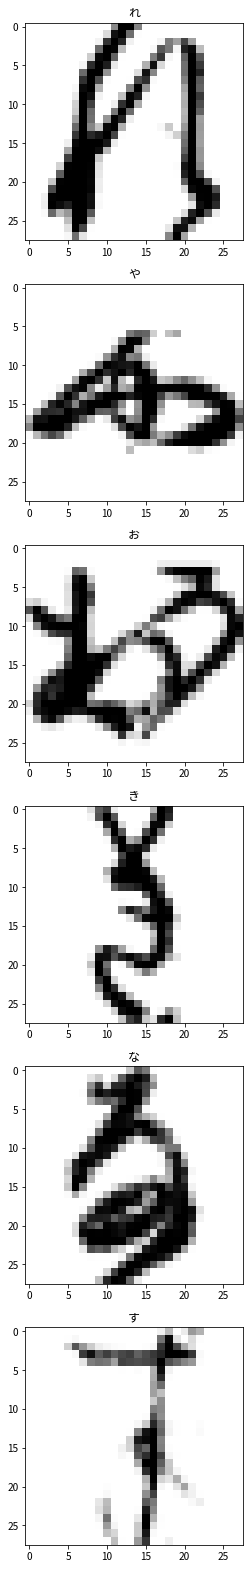

In [13]:
fig, ax = plt.subplots(6, 1, figsize=(width, height))

for i, sample in enumerate(X_train['arr_0'][:6]):
    ax[i].title.set_text(label_to_char(y_train['arr_0'][i]))
    ax[i].imshow(sample, cmap='binary')

In [14]:
# Let's transform the targets to one hot encoded arrays
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train['arr_0'].reshape(-1, 1))
y_test = one_hot.transform(y_test['arr_0'].reshape(-1, 1))

/home/chep/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [15]:
y_train[:6].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
# Reshape images to have an extra dimension for color channel when using Conv2D
X_train = X_train['arr_0'].reshape(-1, width, height, 1)
X_test = X_test['arr_0'].reshape(-1, width, height, 1)

In [31]:
# Let's try a simple Net
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D

In [40]:
model = Sequential()
model.add(Conv2D(10, (1,1), input_shape=(width, height, 1)))
model.add(Flatten())
model.add(Dense(width * height))
model.add(Dense(10))

In [41]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        20        
_________________________________________________________________
flatten_5 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               6147344   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 6,155,214
Trainable params: 6,155,214
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x=X_train, y=y_train, batch_size=600, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 27s 458us/step - loss: 8.6596 - acc: 0.2220
Epoch 2/10
60000/60000 [==============================] - 30s 507us/step - loss: 9.0253 - acc: 0.2683
Epoch 3/10
60000/60000 [==============================] - 30s 507us/step - loss: 8.0456 - acc: 0.2867
Epoch 4/10
60000/60000 [==============================] - 30s 507us/step - loss: 8.0456 - acc: 0.2867
Epoch 5/10
60000/60000 [==============================] - 30s 505us/step - loss: 8.0456 - acc: 0.2867
Epoch 6/10
60000/60000 [==============================] - 30s 508us/step - loss: 8.0456 - acc: 0.2867
Epoch 7/10
60000/60000 [==============================] - 30s 505us/step - loss: 8.0456 - acc: 0.2867
Epoch 8/10
60000/60000 [==============================] - 31s 509us/step - loss: 8.0456 - acc: 0.2867
Epoch 9/10
60000/60000 [==============================] - 30s 505us/step - loss: 8.0456 - acc: 0.2867
Epoch 10/10
60000/60000 [==============================] - 31s 514us/step - loss: 

In [44]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 232us/step


[8.02681159515381, 0.2296]